# Métodos Numéricos (2024)

## Guía 5: 2024-05-07 - Derivadas

In [1]:
using Plots
using LaTeXStrings

## Problema 1


Defina una función, que, dada una función, un punto y un intervalo, retorne una aproximación a la derivada de la función dada, evaluada en el punto dado, utilizando la fórmula de diferencias finitas que se deriva de la siguiente aproximación (*fórmula centrada de tres puntos*): 


$$
f^\prime(x) = \frac{f(x+h) - f(x-h)}{2h} + \mathcal{O}(h^2)
$$

Utilize dicha función para evaluar la derivada de la función $f(x) = x e^x$ en el punto $x=2$
para distintos valores de $h$ y calcule el incremento óptimo $h_o$ teniendo en cuenta los errores de truncamiento y redondeo. 
Usando la diferencia entre $f'(2)$ (calculado en Julia usando las funciones matemáticas incorporadas) y el valor de la aproximación mencionada, grafique en escala *log-log* el error versus $h$ para $h = 10^{-k}$ con $k$ entero.

In [30]:
#como hago eso del incremento optimo??

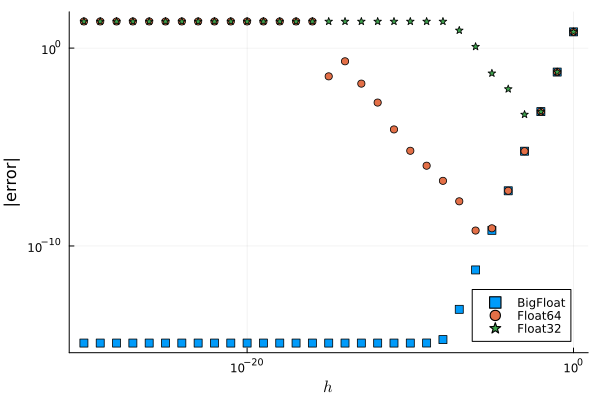

In [2]:
f(x)=x*exp(x) # la funcion tranqui
df(x)=(x+1)*exp(x) #esta es la derivada hecha a mano
dfh(x,h)=(f(x+h)-f(x-h))/(2*h) # esta es la funcion que retorna la aproximacion de derivada

hvec= [BigFloat(10)^(-k) for k=0:30] #guardo en un vector valores chicos para h
#ahora grafico todo
plot(xscale=:log,yscale=:log,title="",xlab=L"h",ylab="|error|",legend=:bottomright)
scatter!(hvec,h->abs(dfh(2,h)-3*exp(2)),label="BigFloat",markershape=:square)
scatter!(hvec,h->abs(dfh(2,Float64(h))-3*exp(2)),label="Float64",markershape=:circle)
scatter!(hvec,h->abs(dfh(2,Float32(h))-3*exp(2)),label="Float32",markershape=:star5)

## Problema 2

Para funciones $f(x)$ que son suficientemente diferenciables en $x=c$

1. Muestre que se  puede aproximar $f'(c)$ con la *fórmula centrada de 5 puntos*
$$
D_5f(c) := \,\frac{1}{12 h} \left(f(c-2 h)-8 f(c-h)+8 f(c+h)-f(c+2 h)
\right)
$$


2. Muestre que la aproximación es exacta para polinomios de grado $\le 4$.
*Ayuda:* calcule explícitamente el término expresado como $O(h^4)$ en la ecuación siguiente, usando una expansión en serie de Taylor alrededor de $x=c$ de todas las evaluaciones de la función que aparecen en la fórmula para $D_5f(c)$.

$$
f'(c)\,=\,\frac{1}{12 h} \left(f(c-2 h)-8 f(c-h)+8 f(c+h)-f(c+2 h)
\right)\,+\,O(h^4)
$$

## Respuesta (incompleta)
Vamos a probar que $f'(c)$ se puede aproximar con la *fórmula centrada en 5 puntos*, usamos la expansión en la serie de Taylor de $f(x)$ al rededor de $x=c$, 
$$
f(x)= f(c)+f'(c)(x-c)+\,\frac{f''(c)}{2!}(x-c)^2 +\,\frac{f'''(c)}{3!}(x-c)^3+...
$$ (re feliz al fin aprendí a escribir el latex)
Como estamos interesados en la derivada primera en $x=c$, tomamos los primeros dos términos de la serie,
$$
f(x)= f(c)+f'(c)(x-c) 
$$(iba con el igual ondulado)
ahora evaluamos esta aprox en los puntos (c-2h), (c-h), (c), (c+h),(c+2h)
*... es la dem de chatgpt, escribí un poco para aprender latex*

## Problema 3

1. Implemente el cálculo aproximado de las derivadas de una función arbitraria utilizando las fórmulas *i) hacia adelante de 2 puntos*, *ii) centrada de 3 puntos* y *iii) centrada de 5 puntos*.

2. Aplíquelas para obtener los valores aproximados de las derivadas de $f(x)=\cos x$ y $g(x)=e^x$.

3. Haga un gráfico *log-log* del error relativo $E$ vs $h$ para $h\in [\epsilon_m(x),0.1]$ y $x=0.1, 1, 100$. Aquí $\epsilon_m(x)$ es la precisión de la máquina al valor $x$.

4. Verifique si el número de cifras decimales que obtiene coincide con las estimaciones presentadas en el téorico.

5. Identifique las regiones donde domina el error del algoritmo y el error de redondeo, respectivamente. Las pendientes que se observan, corresponden a las predichas en el teórico?

In [2]:
## i) metodo hacia adelante de dos puntos (h>0 si o si)
function dospuntos(f,x,h)
    deriv=(f(x+h)-f(x))/h
    return deriv
end
## ii) Método centrada en 3 puntos
function trespuntos(f,x,h)
    deriv=(f(x+h)-f(x-h))/(2*h)
    return deriv
end
## iii) Método centrada en 5 puntos
function cincopuntos(f,x,h)
    deriv=(-25*f(x)+48*f(x+h)-36*f(x+2*h)+16*f(x+3*h)-3*f(x+4*h) )/(12*h)
    return deriv
end

cincopuntos (generic function with 1 method)

In [25]:
f(x)=cos(x)
g(x)=exp(x)

hvec= [(0.1)/k for k=20:-1:1] #creo un vector con muchos h pequeños de un valor positivo hasta 0.1, asumo un epsilon 0.005
println(hvec)
#eps(x) no me sale usar esta función

[0.005, 0.005263157894736842, 0.005555555555555556, 0.0058823529411764705, 0.00625, 0.006666666666666667, 0.0071428571428571435, 0.007692307692307693, 0.008333333333333333, 0.009090909090909092, 0.01, 0.011111111111111112, 0.0125, 0.014285714285714287, 0.016666666666666666, 0.02, 0.025, 0.03333333333333333, 0.05, 0.1]


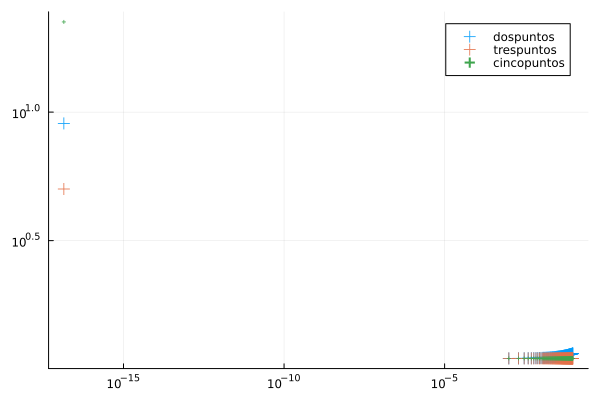

In [77]:
#hago el primer gráfico
#x=0.1
intervalo = eps(0.1):0.001:0.1 #a la funcion eps no le gustan los enteros, le mando reales con poner un .0 despues
plot(intervalo,h->abs((f(0.1)-dospuntos(f,0.1,h))/f(0.1)),label="dospuntos",seriestype=:scatter,markershape=:cross,ms=6 )
plot!(intervalo,h->abs((f(0.1)-trespuntos(f,0.1,h))/f(0.1)),label="trespuntos",seriestype=:scatter,markershape=:cross,ms=6)
plot!(intervalo,h->abs((f(0.1)-cincopuntos(f,0.1,h))/f(0.1)),label="cincopuntos",seriestype=:scatter,markershape=:cross,ms=2)
#les cambie el tamañ y forma para que se note que si aparecen en el grafico, aunque queda medio feo
plot!(yscale=:log10,xscale=:log10)
#xlims!=(1e-5, 1e+2)
#ylims!(1e-5, 1e+0)
    #h->abs(dfh(2,h)-3*exp(2))

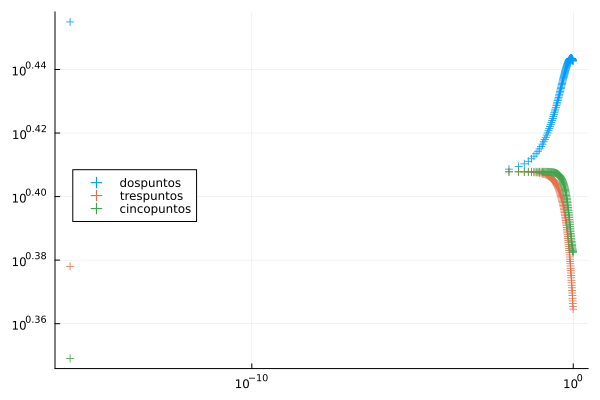

In [73]:
#hago el segundo gráfico
#x=1
intervalo = eps(1.0):0.01:1
plot(intervalo,h->abs((f(1)-dospuntos(f,1,h))/f(1)),label="dospuntos",seriestype=:scatter,markershape=:cross)
plot!(intervalo,h->abs((f(1)-trespuntos(f,1,h))/f(1)),label="trespuntos",seriestype=:scatter,markershape=:cross)
plot!(intervalo,h->abs((f(1)-cincopuntos(f,1,h))/f(1)),label="cincopuntos",seriestype=:scatter,markershape=:cross)
plot!(yscale=:log10,xscale=:log10)
plot!(legend=:left) #aqui no molesta el cartel

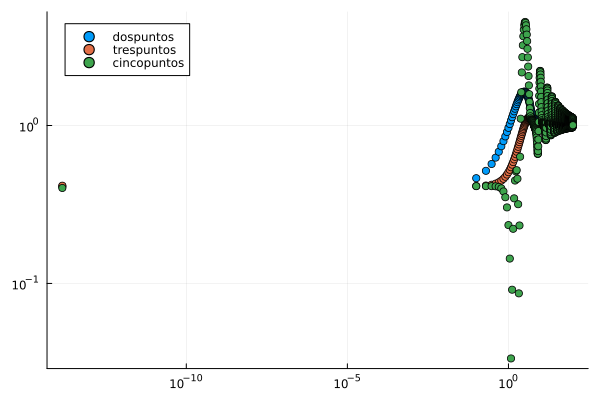

In [47]:
#hago el tercer gráfico
#x=100
intervalo = eps(100.0):0.1:100 #una bestialidad el grafico a pasos mas chicos
plot(intervalo,h->abs((f(100)-dospuntos(f,100,h))/f(100)),label="dospuntos",seriestype=:scatter)
plot!(intervalo,h->abs((f(100)-trespuntos(f,100,h))/f(100)),label="trespuntos",seriestype=:scatter)
plot!(intervalo,h->abs((f(100)-cincopuntos(f,100,h))/f(100)),label="cincopuntos",seriestype=:scatter)
plot!(yscale=:log10,xscale=:log10)
plot!(legend=:topleft) # para que no tape al magnífico gráfico que salió

In [78]:
#no se responder los utimos incisos :(

## Problema 4

En el archivo `pos.dat` que se encuentra en el repositorio se dispone de un conjunto de datos experimentales de la posición de un móvil que se desplaza en línea recta. El mismo tiene dos columnas, siendo la primera el tiempo de la medición, $t_i$ y la segunda la posición, $x(t_i)$.

1. Escriba un programa que lea los datos del archivo y calcule la velocidad del móvil para los mismos tiempos, $t_i$. Utilice la fórmula de 3 puntos. Preste especial atención a los puntos de los bordes del intervalo.
2. Repita el punto 1. utilizando las fórmulas de 5 puntos.

**Ayuda:** Para bajar el archivo `pos.dat` del repositorio de github desde julia realice:

In [ ]:
# Ejemplo de como bajar un archivo.
separador = "/" # En Linux
#separador = "\" # En Windows
download(
    "https://raw.githubusercontent.com/reula/Metodos_Numericos_2022/main/Guias/pos.dat", # Bajamos el archivo pos.dat del repositorio en el que están las guías.
    pwd() * separador * "pos.dat" # Guardamos lo bajado en un archivo llamado pos.dat en el directorio local.
)

1. **Notar que Windows usa `"\"` en vez de `"/"`.**

2. Cuando entre a github a ver los links a los archivos, seleccione primero el archivo, cuando se visualice selecione el botón **Raw**. Fíjese que el link debe comenzar con https://raw.githubusercontent.com

**Ayuda:** Para cargar los datos en `pos.dat` a vectores de Julia utilice:

In [ ]:
t = Vector{Float64}()
x = Vector{Float64}()
open("pos.dat","r") do fh
    for line in readlines(fh) 
        cols = split(line)
        push!(t,parse(Float64,cols[1]))
        push!(x,parse(Float64,cols[2]))
    end
end

# Ejercicios Complementarios

## Problema C.1

**Derivada segunda:** Deduzca la fórmula centrada equiespaciada de tres puntos para la derivada segunda $f''(x_0)$. Incluya una cota para el error absoluto.

## Problema C.2

**Interpolación y diferenciación:** Se conoce el valor de $f(x)$ en tres puntos $x_0,x_1,x_2$. Escriba el polinomio interpolante $P_2(x)$ en la forma de Lagrange. Asuma que aproximamos $f'(x_i)$ por $P_2'(x_i)$,

1. Muestre que si tomamos $x_0=c-h,\,x_1=c,\,x_2=c+h$ obtenemos la expresión del algoritmo centrado de tres
puntos para $f'(c)$. 
2. Muestre que, en general, esta proximación arroja el algoritmo de tres puntos. Reobtenga la fórmula dada en el teórico para $x_0=c-h_1,\,x_1=c,\,x_2=c+h_2$. Obtenga una expresión para las derivadas en extremos del intervalo $[a,b]$, $f'(a)$ con $x_0=a,\,x_1=a+h,\,x_2=a+2 h$ y $f'(b)$ con $x_0=b,\,x_1=b-h,\,x_2=b-2h$.
3. Generalice a 5 puntos y re-obtenga el algoritmo centrado y equiespaciado en este caso.